# Predictive Analysis : Telco Customer Churn

#### Author : Indra Yanto Simanihuruk

## 0. Setting The Work Environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, classification_report,f1_score,precision_recall_curve,roc_curve
from imblearn import over_sampling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
from google.colab import drive,files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1. Data Profiling and Summarizing

The customer base dataset used in this work is made available by IBM and downloaded from Kaggle. It is related to an anonymous telecom company and contains 7043 customers data with 21 attributes where each row represents a customer and each column contains customer’s attributes. Link for the dataset : https://www.kaggle.com/blastchar/telco-customer-churn

In [3]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
row_n,col_n=df.shape
print(f'Datasets consist of {row_n} rows and {col_n} columns')

Datasets consist of 7043 rows and 21 columns


### 1.1  Describing each feature

 Let's describe each feature shortly:
- **CustomerID** : Represents Unique Id Number of each customer (Need to be dropped!)
- **gender** : Categorical data, represents the customer gender
- **SeniorCitizen** : Categorical data, identifies whether the customer is a senior citizen or not (1, 0) *Has been encoded
- **Partner** : Categorical data, identifies whether the customer has a partner or not (Yes, No)
- **Dependents** : Categorical data, identifies whether the customer has dependents or not (Yes, No)
- **tenure** : Number of months the customer has stayed with the company
- **PhoneService** : Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** : Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService** : Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** : Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup** : Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** : Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** : Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV** : Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** : Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract** : The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling** : Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** : The amount charged to the customer monthly
- **TotalCharges** : The total amount charged to the customer
- **Churn** : Target variable, define whether the customer churned or not (Yes or No)



### 1.2 Summarizing the Datasets

- The target variable is **Churn**, i.e. customers who left within the last month
- Services consist of phone services, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies 
- The information about customer account consists of tenure, contract, payment method, paperless billing, monthly charges, and total charges
- There are also gender, age range, partners, and dependents to give information about customer demographic

### 1.3 Objectives

This work is carried out to answer this problem :

- Which machine learning model is the most accurate on predicting the churned customer and how is the performance? (Random Forest, KNN, and Logistic Regression are the only models that will be examined for now)

## 2. Data Preprocessing





### 2.1 Checking for the data types and missing values

In [5]:
df_desc=df.isna().sum(axis=0).reset_index()
df_desc.columns=['Variable','Missing_values']
df_desc['Filling_Values (%)']=(row_n-df_desc['Missing_values'])*100/row_n
df_desc['Dtypes']=df.dtypes.values
df_desc

,Variable,Missing_values,Filling_Values (%),Dtypes
0,customerID,0,100.0,object
1,gender,0,100.0,object
2,SeniorCitizen,0,100.0,int64
3,Partner,0,100.0,object
4,Dependents,0,100.0,object
5,tenure,0,100.0,int64
6,PhoneService,0,100.0,object
7,MultipleLines,0,100.0,object
8,InternetService,0,100.0,object
9,OnlineSecurity,0,100.0,object


Based on above dataframe, it appears that :
- **No missing values detected for all variables**
- **Most of the variables considered as categorical (object) and need to be encoded**
- **Tenure, MonthlyCharges, and TotalCharges are considered numerical. However, there are anomalies in the TotalCharges column as its type showed to be an object**

### 2.2 Converting the object values on TotalCharges column

In [6]:
#Check all values of TotalCharges
df.sort_values(by='TotalCharges').head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


After sorting the TotalCharges, we can clearly see that the roots of error when converting the datatypes are **' ' characters**. By looking at the tenure columns, we find out that these anomalies may appear because the tenure values is 0 and one month period hasn't been completed yet or maybe there are free trials. Since this anomaly only appears in 11 rows (only 0.1% of total rows), these rows will be removed.

In [7]:
df[df.TotalCharges==' '] #The rows that will be removed

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df=df[df.TotalCharges!=' '] #the problematic rows have been removed
df['TotalCharges']=df['TotalCharges'].apply(lambda x:float(x))
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [9]:
#Re-checking the datatypes and missing values
df_desc=df.isna().sum(axis=0).reset_index()
df_desc.columns=['Variable','Missing_values']
df_desc['Filling_Values (%)']=(row_n-df_desc['Missing_values'])*100/row_n
df_desc['Dtypes']=df.dtypes.values
df_desc

,Variable,Missing_values,Filling_Values (%),Dtypes
0,customerID,0,100.0,object
1,gender,0,100.0,object
2,SeniorCitizen,0,100.0,int64
3,Partner,0,100.0,object
4,Dependents,0,100.0,object
5,tenure,0,100.0,int64
6,PhoneService,0,100.0,object
7,MultipleLines,0,100.0,object
8,InternetService,0,100.0,object
9,OnlineSecurity,0,100.0,object


The TotalCharges column is already detected as float64 variable



In [10]:
df.drop('customerID',axis=1,inplace=True) #drop the id column since all its values are unique
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### 2.3 Checking for outliers



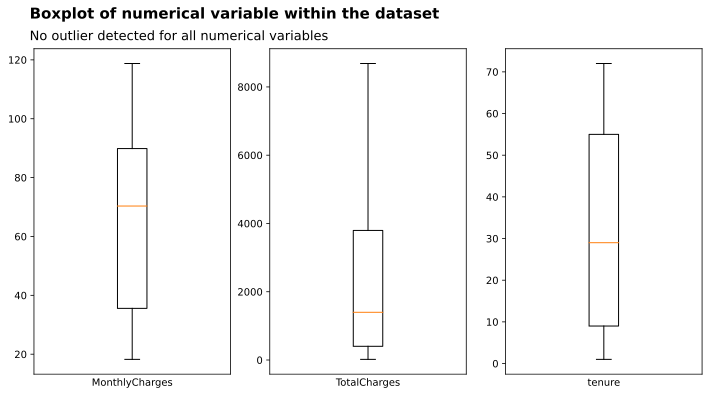

In [11]:
fig,ax=plt.subplots(1,3)
ax[0].boxplot(df.MonthlyCharges)
ax[0].set_xlabel('MonthlyCharges')
ax[0].set_xticklabels([])
ax[0].set_xticks([])
ax[1].boxplot(df.TotalCharges)
ax[1].set_xlabel('TotalCharges')
ax[1].set_xticklabels([])
ax[1].set_xticks([])
ax[2].boxplot(df.tenure)
ax[2].set_xlabel('tenure')
ax[2].set_xticklabels([])
ax[2].set_xticks([])
fig.text(0.12,.95,'Boxplot of numerical variable within the dataset',fontweight='bold',ha='left',fontsize=15)
fig.text(0.12,.9,'No outlier detected for all numerical variables',ha='left',fontsize=13)
fig.set_size_inches(12,6) 
plt.savefig('outlier1.jpg',dpi=360,bbox_inches='tight')
#files.download("outlier1.jpg")

### 2.4 Quick EDA, Feature Engineering, and Categorical Data Handling

Quick Exploratory Data Analysis will be performed to prepare the data better. You can review the complete EDA on my last project through this link https://colab.research.google.com/drive/1iLpyBlI6tkHTbQYsEeiLglVIdbUq2onV?usp=sharing

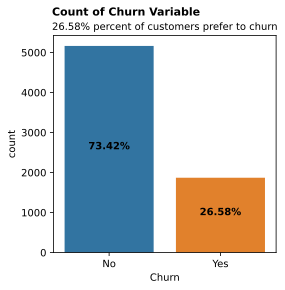

In [12]:
def count_with_percent(var,df=df):
  nrow,ncol=df.shape
  df_agg=df.groupby(by=var)[var].agg(['count']).reset_index()
  df_agg['percentage']=df_agg['count']*100/nrow
  return df_agg
df_agg_churn=count_with_percent('Churn')
fig,ax=plt.subplots(figsize=(4,4))
#palet=sns.color_palette("OrRd",2)
sns.barplot(data=df_agg_churn,x='Churn',y='count',ax=ax)
for x,y,z in zip(df_agg_churn.index,df_agg_churn['count'],df_agg_churn.percentage):
  ax.annotate(str(round(z,2))+'%',(x,0.5*y),ha='center',weight='bold')
fig.text(0.12,.95,'Count of Churn Variable',fontweight='bold',ha='left',fontsize=11)
fig.text(0.12,.9,'26.58% percent of customers prefer to churn',ha='left',fontsize=10)
plt.savefig('churn_univariate.jpg',dpi=360,bbox_inches='tight')

It can be seen that there is a huge imbalance for the target variable since it contains 5163 rows of No entries (73.42\%) and 1869 rows of Yes entries (26.58\%), indicates that the corresponding company has 26.57\% churn rate within the last month.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

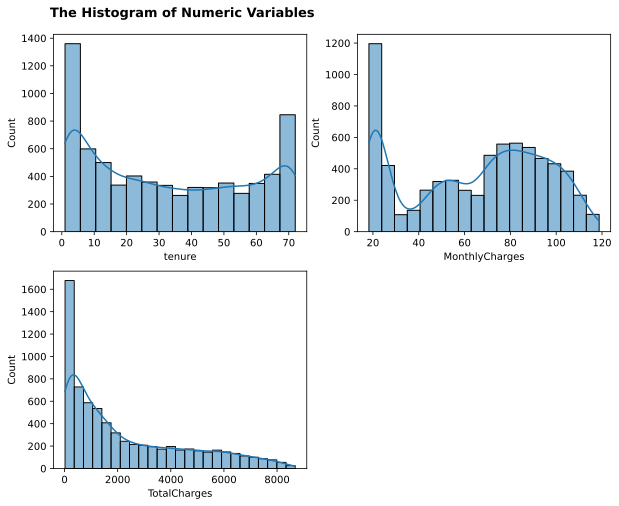

In [13]:
fig,ax=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x='tenure',ax=ax[0,0],kde=True)
sns.histplot(data=df,x='MonthlyCharges',ax=ax[0,1],kde=True)
sns.histplot(data=df,x='TotalCharges',ax=ax[1,0],kde=True)
ax[1,1].axis('off')
fig.text(0.12,.91,'The Histogram of Numeric Variables',fontweight='bold',ha='left',fontsize=13)
plt.savefig('numeric_univ.jpg',dpi=360,bbox_inches='tight')
files.download("numeric_univ.jpg")

In the preceeding section, one can understand that there are 3 numerical variable exist within the dataset such as tenure, MonthlyCharges and TotalCharges. The values of TotalCharges is very far huge compared to tenure and MonthlyCharges, as a result, these 3 features will be Standard Scaled.

In [14]:
scaler=preprocessing.StandardScaler()
num_df=df[['tenure','MonthlyCharges','TotalCharges']]
y=scaler.fit_transform(num_df)
df[['tenure','MonthlyCharges','TotalCharges']]=y
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.214741e-16,9.652878e-17,-1.172113e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,9.199259e-01,8.331482e-01,6.668271e-01
max,1.612573e+00,1.793381e+00,2.824261e+00


In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,-1.280248,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194,No
1,Male,0,No,No,0.064303,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740,No
2,Male,0,No,No,-1.239504,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649,Yes
3,Male,0,No,No,0.512486,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248,No
4,Female,0,No,No,-1.239504,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,-0.343137,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.664868,-0.129180,No
7039,Female,0,Yes,Yes,1.612573,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1.276493,2.241056,No
7040,Female,0,Yes,Yes,-0.872808,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,-1.170004,-0.854514,No
7041,Male,1,Yes,No,-1.158016,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.319168,-0.872095,Yes


Sklearn's model can't process any data types aside from numerical variables. As a result, label encoding becomes very important to be performed. To avoid multicollinearity and increase effectivity, these steps have to be done beforehand :

- 'No' and 'No phone service' in MultipleLines feature will be merged as one value 'No' to avoid the multicollinearity with 'No' from PhoneService feature.

- 'No' and 'No internet service' in OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies will also be merged as one value 'No' to avoid the multicollinearity with 'No' from InternetService  feature. 

Combining these 2 steps with drop_first feature enabled will reduce the encoded columns significantly.

In [16]:
map_multiplelines={'No':'No',
                   'No phone service':'No',
                   'Yes':'Yes'}
map_service={'No':'No',
             'No internet service':'No',
             'Yes':'Yes'}
df['MultipleLines']=df['MultipleLines'].map(map_multiplelines)
df['OnlineSecurity']=df['OnlineSecurity'].map(map_service)
df['OnlineBackup']=df['OnlineBackup'].map(map_service)
df['DeviceProtection']=df['DeviceProtection'].map(map_service)
df['TechSupport']=df['TechSupport'].map(map_service)
df['StreamingTV']=df['StreamingTV'].map(map_service)
df['StreamingMovies']=df['StreamingMovies'].map(map_service)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,-1.280248,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194,No
1,Male,0,No,No,0.064303,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740,No
2,Male,0,No,No,-1.239504,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649,Yes
3,Male,0,No,No,0.512486,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248,No
4,Female,0,No,No,-1.239504,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,-0.343137,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.664868,-0.129180,No
7039,Female,0,Yes,Yes,1.612573,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1.276493,2.241056,No
7040,Female,0,Yes,Yes,-0.872808,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,-1.170004,-0.854514,No
7041,Male,1,Yes,No,-1.158016,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.319168,-0.872095,Yes


In [17]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(lambda x:'Yes' if x==1 else 'No')
df['Churn']=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)

In [18]:
df_1=pd.get_dummies(df,drop_first=True)
df_1

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.064303,-0.260878,-0.173740,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,-1.239504,-0.363923,-0.959649,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0.512486,-0.747850,-0.195248,0,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,-1.239504,0.196178,-0.940457,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.343137,0.664868,-0.129180,0,1,0,1,1,1,1,...,1,1,1,1,1,0,1,0,0,1
7039,1.612573,1.276493,2.241056,0,0,0,1,1,1,1,...,1,0,1,1,1,0,1,1,0,0
7040,-0.872808,-1.170004,-0.854514,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,-1.158016,0.319168,-0.872095,1,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,1


Below is the correlation heatmap for the encoded dataset.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

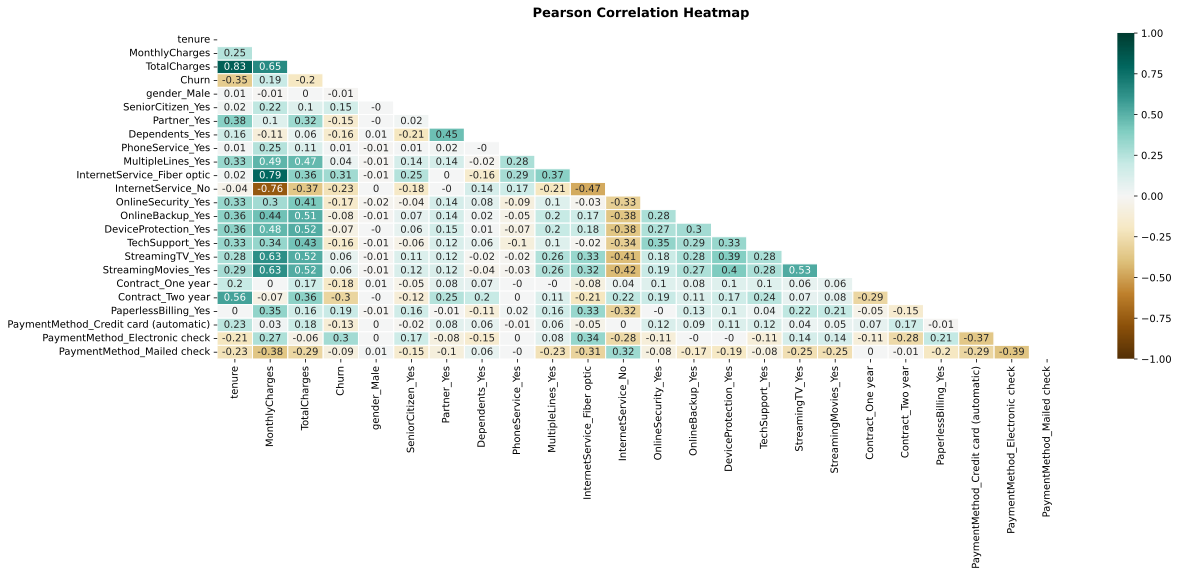

In [19]:
corr=df_1.corr(method='pearson')
corr=round(corr,2)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(19, 6))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',linewidths=1)
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':13}, pad=16,fontweight='bold')
plt.savefig('spearman_cor.jpg',dpi=360,bbox_inches='tight')
files.download("spearman_cor.jpg")

Special only for the regression model, different model of dataset will be created. First, The VIF analysis of each feature will be generated to prevent the multicollinearity. As a result, MonthlyCharges, PhoneServic\_Yes, and TotalCharges will be deleted since these columns have high score of VIF factor.

In [20]:
df_vif=df_1.copy()
df_vif.drop(['Churn'],axis=1,inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns
vif

,VIF Factor,features
0,7.583795,tenure
1,17.269869,MonthlyCharges
2,10.809329,TotalCharges
3,2.020069,gender_Male
4,1.376281,SeniorCitizen_Yes
5,2.827071,Partner_Yes
6,1.969201,Dependents_Yes
7,10.299291,PhoneService_Yes
8,2.640337,MultipleLines_Yes
9,7.622436,InternetService_Fiber optic


In [21]:
df_vif=df_1.copy()
df_vif.drop(['Churn','MonthlyCharges','PhoneService_Yes','TotalCharges'],axis=1,inplace=True)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns
vif

,VIF Factor,features
0,2.396079,tenure
1,1.890508,gender_Male
2,1.356124,SeniorCitizen_Yes
3,2.739789,Partner_Yes
4,1.959203,Dependents_Yes
5,2.264912,MultipleLines_Yes
6,2.884552,InternetService_Fiber optic
7,2.467313,InternetService_No
8,1.850922,OnlineSecurity_Yes
9,2.015478,OnlineBackup_Yes


No high VIF score is found after MonthlyCharges, PhoneService_Yes, TotalCharges columns are dropped.

## 3. Data Processing

### 3.1 Data Splitting

Data Processing is the phase where the machine learning model is being applied. Before applying the models, the dataset will be splitted into train and test data with quantity of 80\% and 20\% respectively. The train data contains 4125 of No entries and 1500 of Yes entries.

In [22]:
X=df_1.drop(['Churn'],axis=1)
y=df_1['Churn']
X_lm=df_1.drop(['Churn','MonthlyCharges','PhoneService_Yes','TotalCharges'],axis=1)
y_lm=df_1['Churn']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train_lm,X_test_lm,Y_train_lm,Y_test_lm=train_test_split(X_lm,y_lm,test_size=0.2,random_state=0) #For Logistic Regression

In [23]:
Y_train.value_counts(normalize=False)

0    4125
1    1500
Name: Churn, dtype: int64

### 3.2 Modelling

Imbalanced dataset that have been prepared will be used to train all the models. Random Forest, KNN, and Logistic Regression are the only models that will be examined for now.

Before training the model, the analysis of the confusion matrix will be carried out first to determine what metric explains our problem better :

- TP : Prediction is Churn  and the actual data is also Churn, *we want that* .
- TN : Prediction is Not Churn and the actual data is also Not Churn, *we also want that*.
- FP : Prediction is Churn, but the actual data is Not Churn, *bad* .
- FN : Prediction is Not Churn, but the actual data is Churn, *worst (loss for the company)*.

For all the cases, it is evident that FN must be kept as low as possible to minimize the company losses. FN is considered as the worst case, that having not churn customer predicted as churn is slightly better than churn customer predicted as not churn. As a result, Recall metric is very important to be examined on this problem. Keep in mind that there is a huge imbalance in the actual train data, making the AUC and F1 score are also quite important to be analyzed.

In [24]:
def plot_confusion_matrix(cm):
  fig,ax =plt.subplots()
  sns.heatmap(cm,annot=True,fmt='.3g',cmap='Blues',ax=ax)
  ax.set_xticklabels(['Churn no (0)','Churn Yes (1)'])
  ax.set_yticklabels(['Churn no (0)','Churn Yes (1)'])
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Value')
  ax.set_ylabel('Actual Value')

#### Random Forest Classifier Model

##### Default Model (Not tuned)

Test Data Evaluation :
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC score is  0.8227099226676275


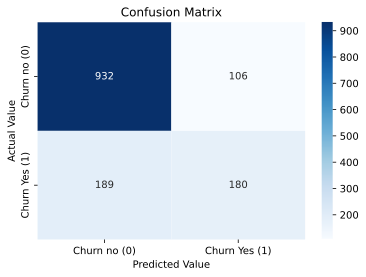

In [25]:
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,Y_train)
rf_preds=rf_model.predict(X_test)
rf_preds_proba=rf_model.predict_proba(X_test)[:,1]
cm_rf=confusion_matrix(Y_test,rf_preds)
plot_confusion_matrix(cm_rf)
print('Test Data Evaluation :')
print(classification_report(Y_test,rf_preds))
print('AUC score is ',roc_auc_score(Y_test, rf_preds_proba))

First, the sklearn's model of RandomForestClassifier will be applied to learn the dataset with all hyperparameter are set to default. It is found that the ROC AUC score of this model is  82\% meanwhile the accuracy is 79\%

##### Tuned Model (Hyperparameter Tuning Method : GridSearch)

The parameters that will be tuned consist of :

- criterion  : function to measure the quality of a split (gini, entropy).
- max_features : number of features to consider when looking for the best split ('sqrt',0.3,0.4,0.5).

Unlike the DecisionTree, RandomForest is quite robust to overfitting and the result is determined by using cumulative voting of all the trees. That's why  min_samples_split and max_depth are not included in the parameter space. The n_estimators hyperparameter is also kept constant on its default value, i.e 100 to avoid very long training time. The optimum tuning will be determined by prioritizing the ROC AUC score. 

In [26]:
rf_model=RandomForestClassifier(random_state=42)
param_space={'n_estimators':[100],'criterion':['gini','entropy'],'max_features':['sqrt',0.3,0.4,0.5]}
gs_model=GridSearchCV(rf_model,param_space,cv=5,scoring=['accuracy','roc_auc','precision','recall'],refit='roc_auc')
gs_model.fit(X_train,Y_train)
print('Best param based on train data:')
print(gs_model.best_params_)
print('AUC score based on train data:')
print(gs_model.best_score_)

Best param based on train data:
{'criterion': 'entropy', 'max_features': 0.3, 'n_estimators': 100}
AUC score based on train data:
0.8237563636363635


The hyperparameter tuning results in 82\% AUC score (train data) with tuned parameters criterion is entropy, max\_features is 0.3, and n\_estimators is 100.
Applying the tuned model on test data gives such results in Figure below:

Test Data Evaluation :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1038
           1       0.64      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC score is  0.8300893943428835


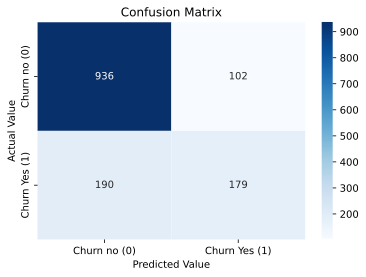

In [27]:
params={'n_estimators':100,'criterion':'entropy','max_features':0.3}
rf_model_tuned=RandomForestClassifier(random_state=42,**params)
rf_model_tuned.fit(X_train,Y_train)
rf_preds=rf_model_tuned.predict(X_test)
rf_preds_proba=rf_model_tuned.predict_proba(X_test)[:,1]
cm_rf=confusion_matrix(Y_test,rf_preds)
plot_confusion_matrix(cm_rf)
print('Test Data Evaluation :')
print(classification_report(Y_test,rf_preds))
print('AUC score is ',roc_auc_score(Y_test, rf_preds_proba))

As can be seen from the results, the tuning process does not result in any significant improvement over the default model. Only in terms of ROC-AUC and Precision score does the tuned model perform better, with a score of 83 percent and 64 percent, respectively.

In [28]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds,2*(p[:-1]*r[:-1])/(p[:-1]+r[:-1]),'k--',label='F1')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

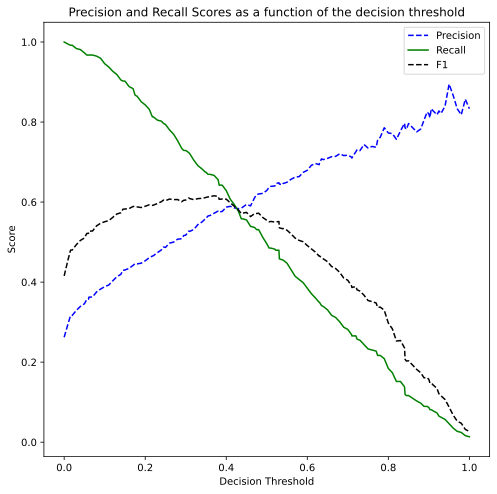

In [29]:
proba_scores=rf_model_tuned.predict_proba(X_test)[:,1]
p,r,thresholds=precision_recall_curve(Y_test,proba_scores)
plot_precision_recall_vs_threshold(p,r,thresholds)
plt.savefig('rf.jpg',dpi=360,bbox_inches='tight')
files.download("rf.jpg")

As explained before, the amount of FN is very important to be kept as low as possible to minimize the loss for the company. One way to check how far we can maximize the Recall score of our model is by plotting the Recall and Precision curve vs the Decision probability threshold. Based on the chart above, it is found that Precision and Recall have such inverse relationship that maximizing the score of Recall will respectively reduce the score of Precision. As a result, setting the recall score of 83% is not considered as good approach since the Precision score will also be significantly reduced to 45% , as well as the accuracy score (70%) and F1 score (59%). In other words, not knowing the allowed minimum limit of Precision score is the obstacles on determining the optimum Recall point.

In [30]:
f1=2*(p[:-1]*r[:-1])/(p[:-1]+r[:-1])
print(f'threshold where F1 is maximum = {thresholds[np.argmax(f1,axis=0)]}')

threshold where F1 is maximum = 0.37


To deal with this problem, the point where F1 reaches its maximum value will be set as the optimum point. In this case, the probability threshold where F1 is maximum is 0.37.

Test Data Evaluation :
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1038
           1       0.58      0.66      0.61       369

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.79      1407



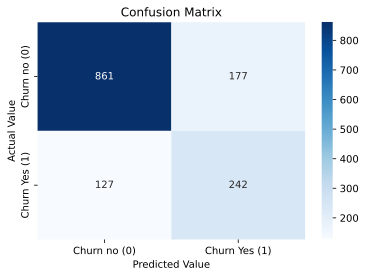

In [31]:
rf_preds_tuned=np.where(rf_preds_proba>0.37,1,0)
cm_rf=confusion_matrix(Y_test,rf_preds_tuned)
plot_confusion_matrix(cm_rf)
print('Test Data Evaluation :')
print(classification_report(Y_test,rf_preds_tuned))

Fortunately, adjusting the decision threshold based on the best F1 score improves the situation significantly. With an AUC score of 83% (**+1%**), the F1 and Recall scores are significantly higher, at 61% (**+5%**) and 66% (**+17%**), respectively, while the accuracy is 78%, only **1%** lower compared to the default model.

#### KNN

##### Default Model (Not tuned)

In this section, The sklearn's model of KNeighborsClassifier will be applied to learn the dataset with all hyperparameter are set to default.

Test Data Evaluation :
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1038
           1       0.56      0.54      0.55       369

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407

AUC score is  0.7816300369169396


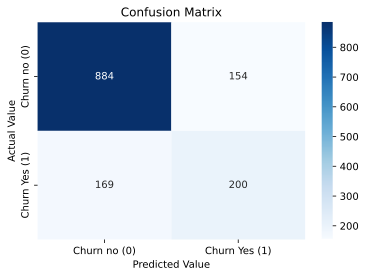

In [32]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,Y_train)
knn_preds=knn_model.predict(X_test)
knn_preds_proba=knn_model.predict_proba(X_test)[:,1]
print('Test Data Evaluation :')
print(classification_report(Y_test,knn_preds))
print('AUC score is ',roc_auc_score(Y_test, knn_preds_proba))
cm_knn=confusion_matrix(Y_test,knn_preds)
plot_confusion_matrix(cm_knn)

Remember that the default value of neighbors in this model is 5. That's why the AUC and accuracy for this model are relatively lower than other models with score of 78\% and 77\% respectively.

##### Tuned Model (Hyperparameter Tuning Method : GridSearch)

For this model, The parameters that will be tuned is n\_neighbors or number of neighbors with value range of 3-81. Remember that KNN's performance heavily relies on n\_neighbors parameter or number of neighbors. The space of n\_neighbors is set from 3 to 81 since the best value usually lies around the root of number of samples in training data (75). Best number of neighbors will be determined based on maximum ROC AUC score. Other hyperparameters will be set to default.

In [33]:
knn_model=KNeighborsClassifier()
param_space={'n_neighbors':[i for i in range(3,81)]}
gs_model=GridSearchCV(knn_model,param_space,cv=5,scoring=['accuracy','roc_auc','precision','recall'],refit='roc_auc')
gs_model.fit(X_train,Y_train)
print('Best param based on train data:')
print(gs_model.best_params_)
print('AUC score based on train data:')
print(gs_model.best_score_)

Best param based on train data:
{'n_neighbors': 78}
AUC score based on train data:
0.8373248484848486


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

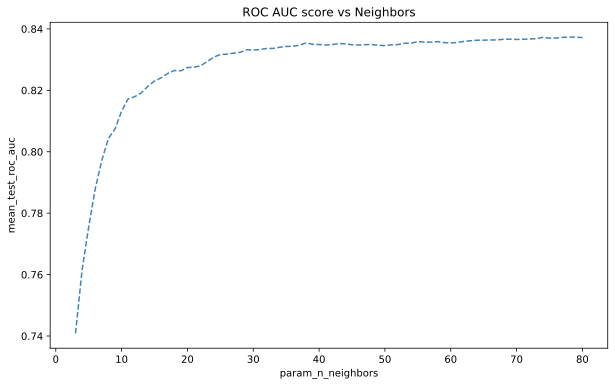

In [34]:
curve_knn=pd.DataFrame(gs_model.cv_results_)
fig,ax=plt.subplots(figsize=(10,6))
sns.lineplot(data=curve_knn,x='param_n_neighbors',y='mean_test_roc_auc',linestyle='--',color='steelblue')
plt.title('ROC AUC score vs Neighbors')
plt.savefig('neighbors.jpg',dpi=360,bbox_inches='tight')
files.download("neighbors.jpg")

Tuned Model Evaluation :

Test Data Evaluation :
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1038
           1       0.62      0.56      0.59       369

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407

AUC score is  0.8328973270464881


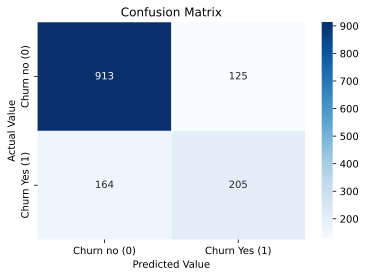

In [35]:
params={'n_neighbors':78}
knn_model_tuned=KNeighborsClassifier(**params)
knn_model_tuned.fit(X_train,Y_train)
knn_preds=knn_model_tuned.predict(X_test)
knn_preds_proba=knn_model_tuned.predict_proba(X_test)[:,1]
cm_knn=confusion_matrix(Y_test,knn_preds)
plot_confusion_matrix(cm_knn)
print('Test Data Evaluation :')
print(classification_report(Y_test,knn_preds))
print('AUC score is ',roc_auc_score(Y_test, knn_preds_proba))

 Based on the tuning process , 78 is considered as the best number of neighbors with AUC score of 84\% (training data). This number of neighbors will be set as the n\_neighbors of the tuned model. From Figure above, one can observe that the improvement of the tuned model is very significant compared to default model. The AUC score increases by **5\%** to 83\%, as well as the accuracy, i.e 79\% (**+2\%**) and F1 score, 59\% (**+4\%**).

Let's check if we can improve the Recall and F1 score by adjusting the decision threshold.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

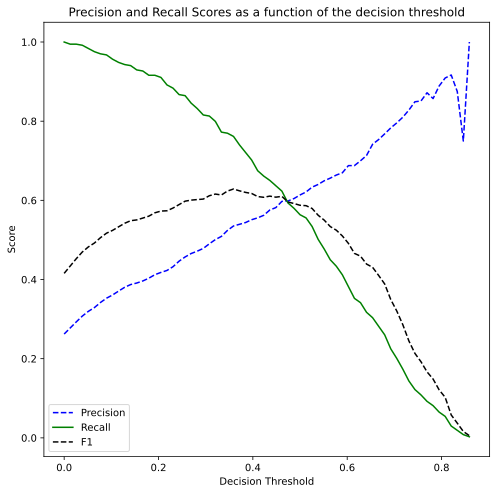

In [36]:
proba_scores=knn_model_tuned.predict_proba(X_test)[:,1]
p,r,thresholds=precision_recall_curve(Y_test,proba_scores)
plot_precision_recall_vs_threshold(p,r,thresholds)
plt.savefig('knn.jpg',dpi=360,bbox_inches='tight')
files.download("knn.jpg")

In [37]:
f1=2*(p[:-1]*r[:-1])/(p[:-1]+r[:-1])
print(f'threshold where F1 is maximum = {thresholds[np.argmax(f1,axis=0)]}')

threshold where F1 is maximum = 0.358974358974359


Test Data Evaluation :
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1038
           1       0.54      0.74      0.62       369

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407



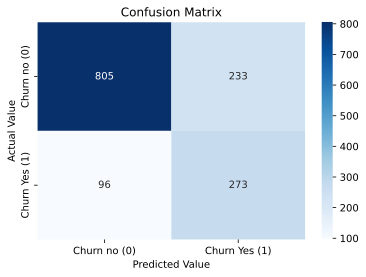

In [38]:
knn_preds_tuned=np.where(knn_preds_proba>0.36,1,0)
cm_knn=confusion_matrix(Y_test,knn_preds_tuned)
plot_confusion_matrix(cm_knn)
print('Test Data Evaluation :')
print(classification_report(Y_test,knn_preds_tuned))

By adjusting the decision threshold to 0.36, the final F1 score is 62% or **7%** higher compared to the default model. The Recall score also significantly increases by **20%** (74%) without any reduction on the Accuracy score, i.e 77%. These significant improvement comes with an AUC score of 83% (**+5%**). 

#### Logistic Regression

##### Default Model (Not Tuned)

The sklearn's model of LogisticRegression will be applied to learn the dataset with all hyperparameter are set to default. Please note that the training and test for this one (only) are quite different since the MonthlyCharges, TotalCharges and PhoneService\_Yes columns are dropped due to high VIF score.

Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.53      0.58       369

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

AUC score:  0.8337393152351562


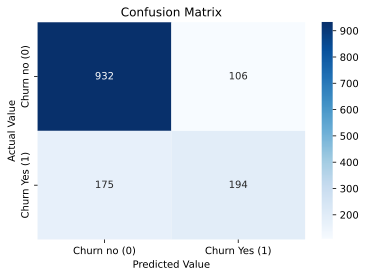

In [39]:
lg_model=LogisticRegression(random_state=42)
lg_model.fit(X_train_lm,Y_train_lm)
lg_preds=lg_model.predict(X_test_lm)
lg_preds_proba=lg_model.predict_proba(X_test_lm)[:,1]
cm_lg=confusion_matrix(Y_test_lm,lg_preds)
plot_confusion_matrix(cm_lg)
print('Test Data Evaluation:')
print(classification_report(Y_test_lm,lg_preds))
print('AUC score: ',roc_auc_score(Y_test_lm, lg_preds_proba))

For the result, it is found that the ROC AUC score of this untuned model is  83\% meanwhile the accuracy is 80\% .

##### Tuned Model (Hyperparameter Tuning Method : GridSearch)

The parameters that will be tuned consist of :

- C : inverse of regularization strength, the smaller the stronger regularization will be (0.01,0.1,1,10,100)
- solver : optimization algorithm (newton-cg,lbfgs,saga,sag,liblinear)

The penalty hyperparameter will be specified as L2 (default). Similar as before, the optimum tuning will also be determined by prioritizing the ROC AUC score. 

In [40]:
lg_model=LogisticRegression(random_state=42)
param_space={'penalty':['l2'],'C':[0.01,0.1,1,10,100],'solver':['lbfgs','saga','newton-cg','liblinear','sag']}
gs_model=GridSearchCV(lg_model,param_space,cv=5,scoring=['accuracy','roc_auc','precision','recall'],refit='roc_auc')
gs_model.fit(X_train_lm,Y_train_lm)
print('Best param based on train data:')
print(gs_model.best_params_)
print('Best AUC score based on train data:')
print(gs_model.best_score_)

Best param based on train data:
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best AUC score based on train data:
0.8435147474747474


Tuned model evaluation :

Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.66      0.52      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.80      1407

AUC score is  0.8330370057072439


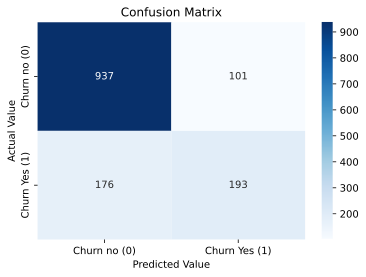

In [41]:
params={'penalty':'l2','C':0.1,'solver':'lbfgs'}
lg_model_tuned=LogisticRegression(random_state=42,**params)
lg_model_tuned.fit(X_train_lm,Y_train_lm)
lg_preds=lg_model_tuned.predict(X_test_lm)
lg_preds_proba=lg_model_tuned.predict_proba(X_test_lm)[:,1]
cm_lg=confusion_matrix(Y_test_lm,lg_preds)
plot_confusion_matrix(cm_lg)
print('Test Data Evaluation:')
print(classification_report(Y_test_lm,lg_preds))
print('AUC score is ',roc_auc_score(Y_test_lm,lg_preds_proba))

The hyperparameter tuning results in 84\% AUC score (train data) with tuned parameters C is 0.1,  and solver is lbfgs. As expected for Logistic Regression Model, the tuning process does not result in any significant improvement over the default model. All the metrics for both models are almost identical with such values :

- Accuracy : 80%
- AUC : 83%
- Precision : 66%
- Recall : 52%
- F1 : 58%

Similar as before, the decision/probability threshold will be adjusted to maximize the F1 score and obtain better recall score.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

threshold where F1 is maximum = 0.300303588372833


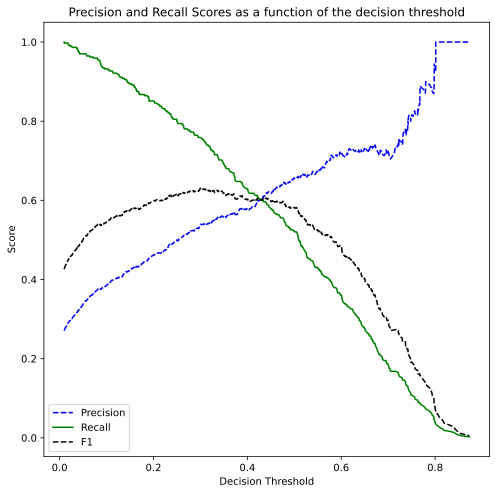

In [42]:
proba_scores=lg_model_tuned.predict_proba(X_test_lm)[:,1]
p,r,thresholds=precision_recall_curve(Y_test_lm,proba_scores)
plot_precision_recall_vs_threshold(p,r,thresholds)
plt.savefig('lg.jpg',dpi=360,bbox_inches='tight')
files.download("lg.jpg")
f1=2*(p[:-1]*r[:-1])/(p[:-1]+r[:-1])
print(f'threshold where F1 is maximum = {thresholds[np.argmax(f1,axis=0)]}')

It is found that the best decision threshold for maximum F1 score is 0.3.

Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1038
           1       0.54      0.76      0.63       369

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407



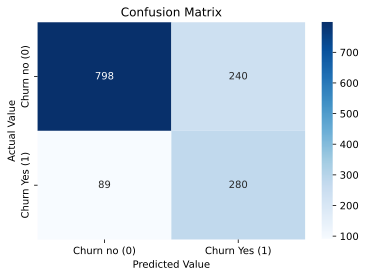

In [43]:
lg_preds_tuned=np.where(lg_preds_proba>0.3,1,0)
cm_lg=confusion_matrix(Y_test_lm,lg_preds_tuned)
plot_confusion_matrix(cm_lg)
print('Test Data Evaluation:')
print(classification_report(Y_test_lm,lg_preds_tuned))

After adjusting the decision threshold, the improvement becomes very clear as the Recall and F1 score are significantly increased to 76\% (**+23\%**) and 63\% (**+5\%**) respectively , compared to the default model. With an AUC score of 83\% (**+0\%**), those metrics are successfully increased without a lot of reduction in accuracy, only **3\%** lower from the default model with the score of **77\%**.

## 4. Conclusion

From all the results above it can be concluded that :

- Overall, one can see that the hyperparameter tuning does not always result in good improvement. Among the three models, KNN Classifier is the only model that significantly improves after the hyperparameter tuning was applied. This phenomenon is actually normal since KNN's performance heavily relies on the number of neighbours. Compared to the untuned model,  ROC AUC, accuracy and F1 scores are increased by **5\%**, **2\%**, and **4\%** respectively to 83\%, 79\%, and 59\%. Other than hyperparameter tuning, adjusting the decision threshold is able to effectively increase the Recall and F1 score for all models. Since the dominant category in this dataset is 0 (Not Churn), the maximum value of F1 score is inclined towards the Recall score, thus helps us to determine the best threshold (in this case, Recall is valued higher than Precision).

- Logistic Regression Classifier is considered as the best model due to its performance. After being tuned with GridSearchCV method and adjusted to 0.3 decision/probability threshold, the improvement becomes significant compared to the default model as the Recall and F1 score are increased to 76\% (**+23\%**) and 63\% (**+5\%**) respectively . With an AUC score of 83\% (**+0\%**), those metrics are successfully increased without a lot of reduction in accuracy, only **3\%** lower from the default model with the score of 77\%. Even though the AUC score of KNN, RF, and Logistic Regression are almost identical, the combination of Recall, F1, and Accuracy owned by LogisticRegression Model is relatively better than KNN  and Random Forest.

- Feature importance of the Logistic regression model can be seen below. Notice that the coefficients are both positive and negative. It can be elaborated as the predictor of Class 1 (Churn Yes) has positive coefficient whereas the predictor of Class 0 (Churn No) has negative coefficient. Overall, it is evident that the graph  is already in accordance to the result of EDA project carried out before on similar dataset . Contract, tenure, InternetService, PaymentMethod and some additional internet services such as TechSupport and Streaming are considered as the key features on which the business strategists should focus to improve the level of satisfaction and retent the customer.
	


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

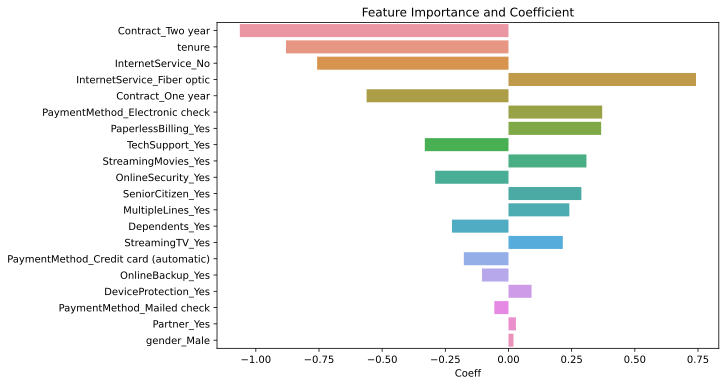

In [44]:
importance=pd.DataFrame({'Feature':X_train_lm.columns,'Coeff':lg_model_tuned.coef_[0]})
importance['Abs_Coeff']=abs(importance['Coeff'])
importance2=importance.sort_values('Abs_Coeff',ascending=False).drop(['Abs_Coeff'],axis=1).reset_index(drop=True)
fig,ax=plt.subplots(figsize=(9,6))
sns.barplot(data=importance2,y='Feature',x='Coeff',ax=ax)
ax.set_title('Feature Importance and Coefficient')
ax.set_ylabel('')
plt.savefig('fi.jpg',dpi=360,bbox_inches='tight')
files.download("fi.jpg")